<a href="https://colab.research.google.com/github/Marcellecarol/-Desafio-Data-Science---TelecomX/blob/main/%F0%9F%9A%80_Desafio_Data_Science_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [ ]:
#  Extração de dados do GitHub (JSON)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Leitura do JSON direto da URL
df = pd.read_json(url)

# Visualizando os 5 primeiros registros
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Verificar estrutura e tipos de dados
df.info()

# Verificar colunas com valores nulos
df.isnull().sum()

# Verificar estatísticas básicas
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
# Checar tipo de dados por coluna
df.dtypes


,0
customerid,object
churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
# Verifica se alguma célula da coluna é um dicionário
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"Coluna com dicionário detectada: {col}")


Coluna com dicionário detectada: customer
Coluna com dicionário detectada: phone
Coluna com dicionário detectada: internet
Coluna com dicionário detectada: account


In [ ]:
df['customer'].iloc[0]
# Faça o mesmo para as demais, se quiser: 'phone', 'internet', 'account'



{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [ ]:
# Expandir cada coluna com dicionário
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenar tudo num único DataFrame
df_final = pd.concat([df[['customerid', 'churn']], df_customer, df_phone, df_internet, df_account], axis=1)



In [ ]:
# Remover duplicatas
df_final.drop_duplicates(inplace=True)

# Verificar estrutura final
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print(df_final.columns.tolist())




['customerid', 'churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [ ]:
df_final.columns = df_final.columns.str.lower().str.replace('.', '_')


In [ ]:
df_final['charges_monthly'] = pd.to_numeric(df_final['charges_monthly'], errors='coerce')
df_final['charges_total'] = pd.to_numeric(df_final['charges_total'], errors='coerce')
df_final['tenure'] = pd.to_numeric(df_final['tenure'], errors='coerce')
df_final['seniorcitizen'] = df_final['seniorcitizen'].astype(int)


In [ ]:
print(df_final.isnull().sum())
df_final['charges_total'].fillna(df_final['charges_total'].median(), inplace=True)


customerid           0
churn                0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
charges_monthly      0
charges_total       11
dtype: int64


<ipython-input-19-5386b1e0d41e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['charges_total'].fillna(df_final['charges_total'].median(), inplace=True)


In [ ]:
df_final['charges_total'] = df_final['charges_total'].fillna(df_final['charges_total'].median())


In [ ]:
# 1. Padronizar nomes das colunas para lowercase e substituir espaços por underscore
df_final.columns = df_final.columns.str.lower().str.replace(' ', '_')

# 2. Transformar colunas numéricas para tipo numérico (caso ainda não estejam)
df_final['charges_monthly'] = pd.to_numeric(df_final['charges_monthly'], errors='coerce')
df_final['charges_total'] = pd.to_numeric(df_final['charges_total'], errors='coerce')
df_final['tenure'] = pd.to_numeric(df_final['tenure'], errors='coerce')
df_final['seniorcitizen'] = pd.to_numeric(df_final['seniorcitizen'], errors='coerce')

# 3. Tratar valores nulos (se houver)
df_final['charges_total'] = df_final['charges_total'].fillna(df_final['charges_total'].median())

# 4. Padronizar valores categóricos para lowercase e retirar espaços extras
cat_cols = df_final.select_dtypes(include='object').columns
for col in cat_cols:
    df_final[col] = df_final[col].str.lower().str.strip()

# 5. Ajustar coluna churn para binário ou string consistente
df_final['churn'] = df_final['churn'].map({'yes': 'sim', 'no': 'não'})

# Pronto para análise exploratória!


<ipython-input-26-4c7e62cd72b1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='churn', palette='Set2', ax=axs[0, 0])
<ipython-input-26-4c7e62cd72b1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='churn', y='charges_monthly', palette='Set3', ax=axs[1, 0])


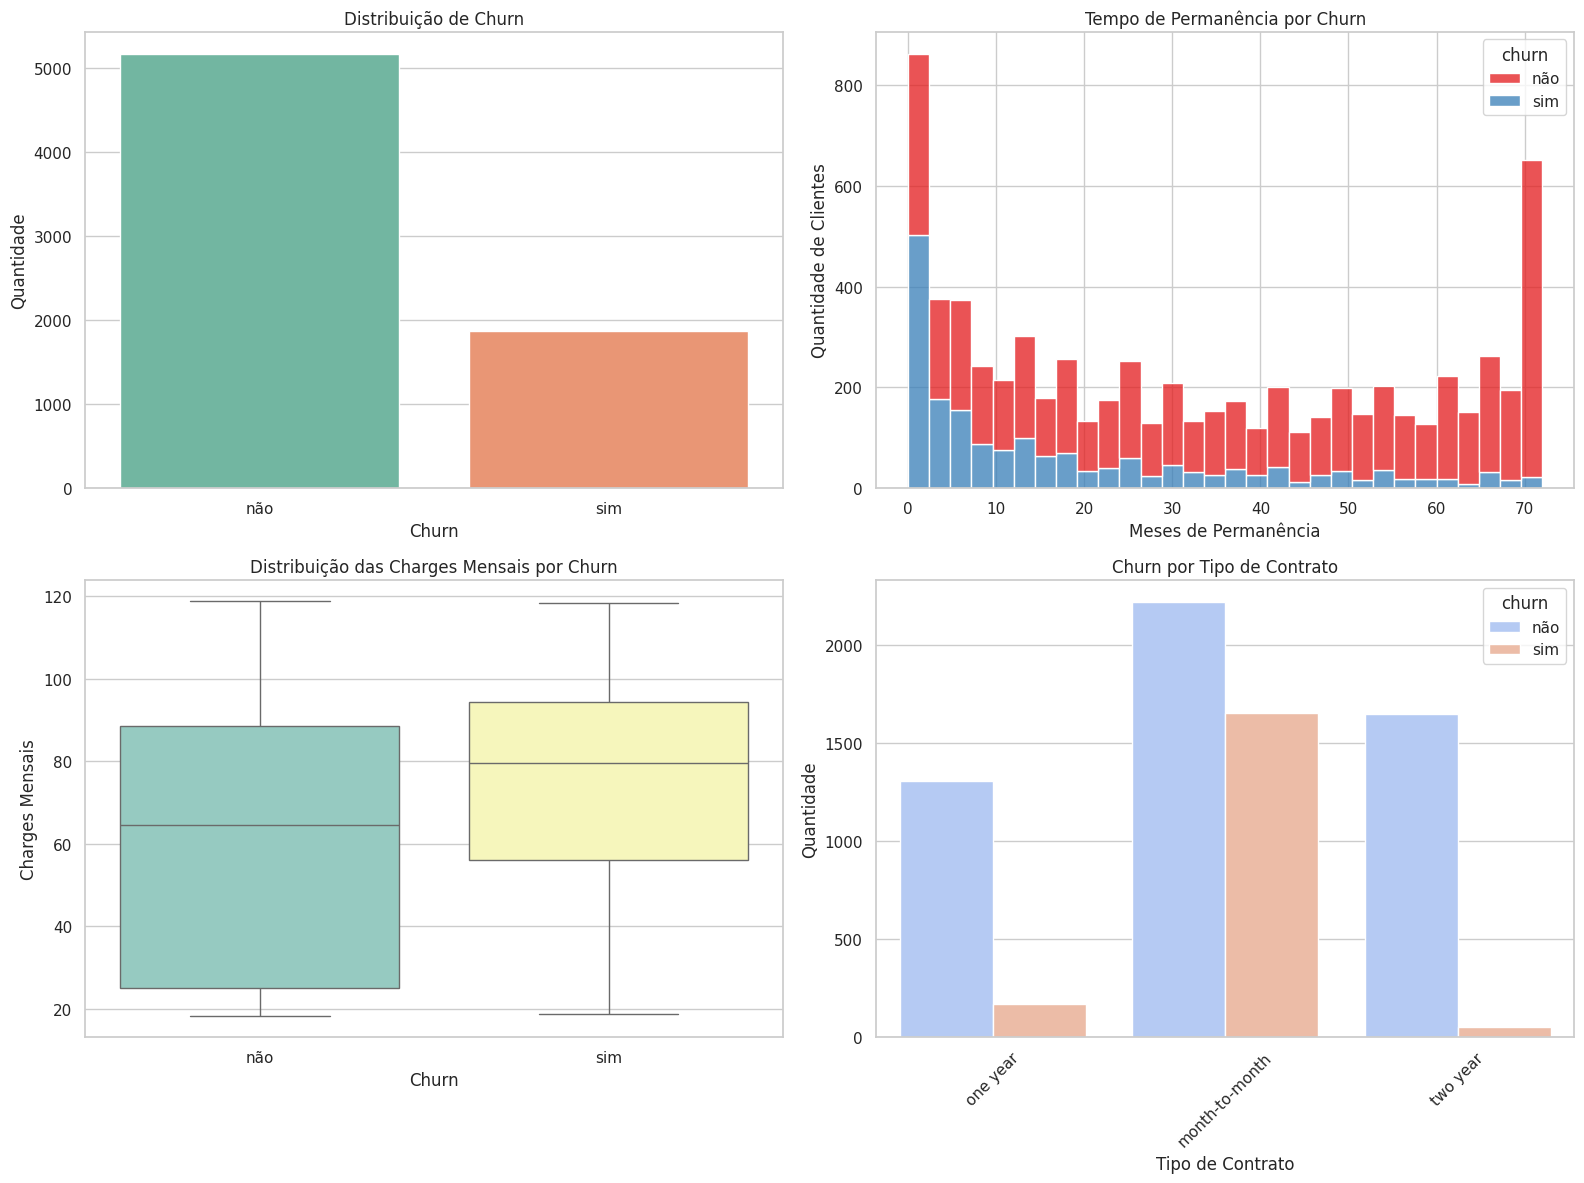

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribuição do churn
sns.countplot(data=df_final, x='churn', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de Churn')
axs[0, 0].set_xlabel('Churn')
axs[0, 0].set_ylabel('Quantidade')

# 2. Tempo de permanência (tenure) x churn
sns.histplot(data=df_final, x='tenure', hue='churn', multiple='stack', bins=30, palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Tempo de Permanência por Churn')
axs[0, 1].set_xlabel('Meses de Permanência')
axs[0, 1].set_ylabel('Quantidade de Clientes')

# 3. Charges mensais por churn (boxplot)
sns.boxplot(data=df_final, x='churn', y='charges_monthly', palette='Set3', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição das Charges Mensais por Churn')
axs[1, 0].set_xlabel('Churn')
axs[1, 0].set_ylabel('Charges Mensais')

# 4. Churn por tipo de contrato
sns.countplot(data=df_final, x='contract', hue='churn', palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Churn por Tipo de Contrato')
axs[1, 1].set_xlabel('Tipo de Contrato')
axs[1, 1].set_ylabel('Quantidade')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



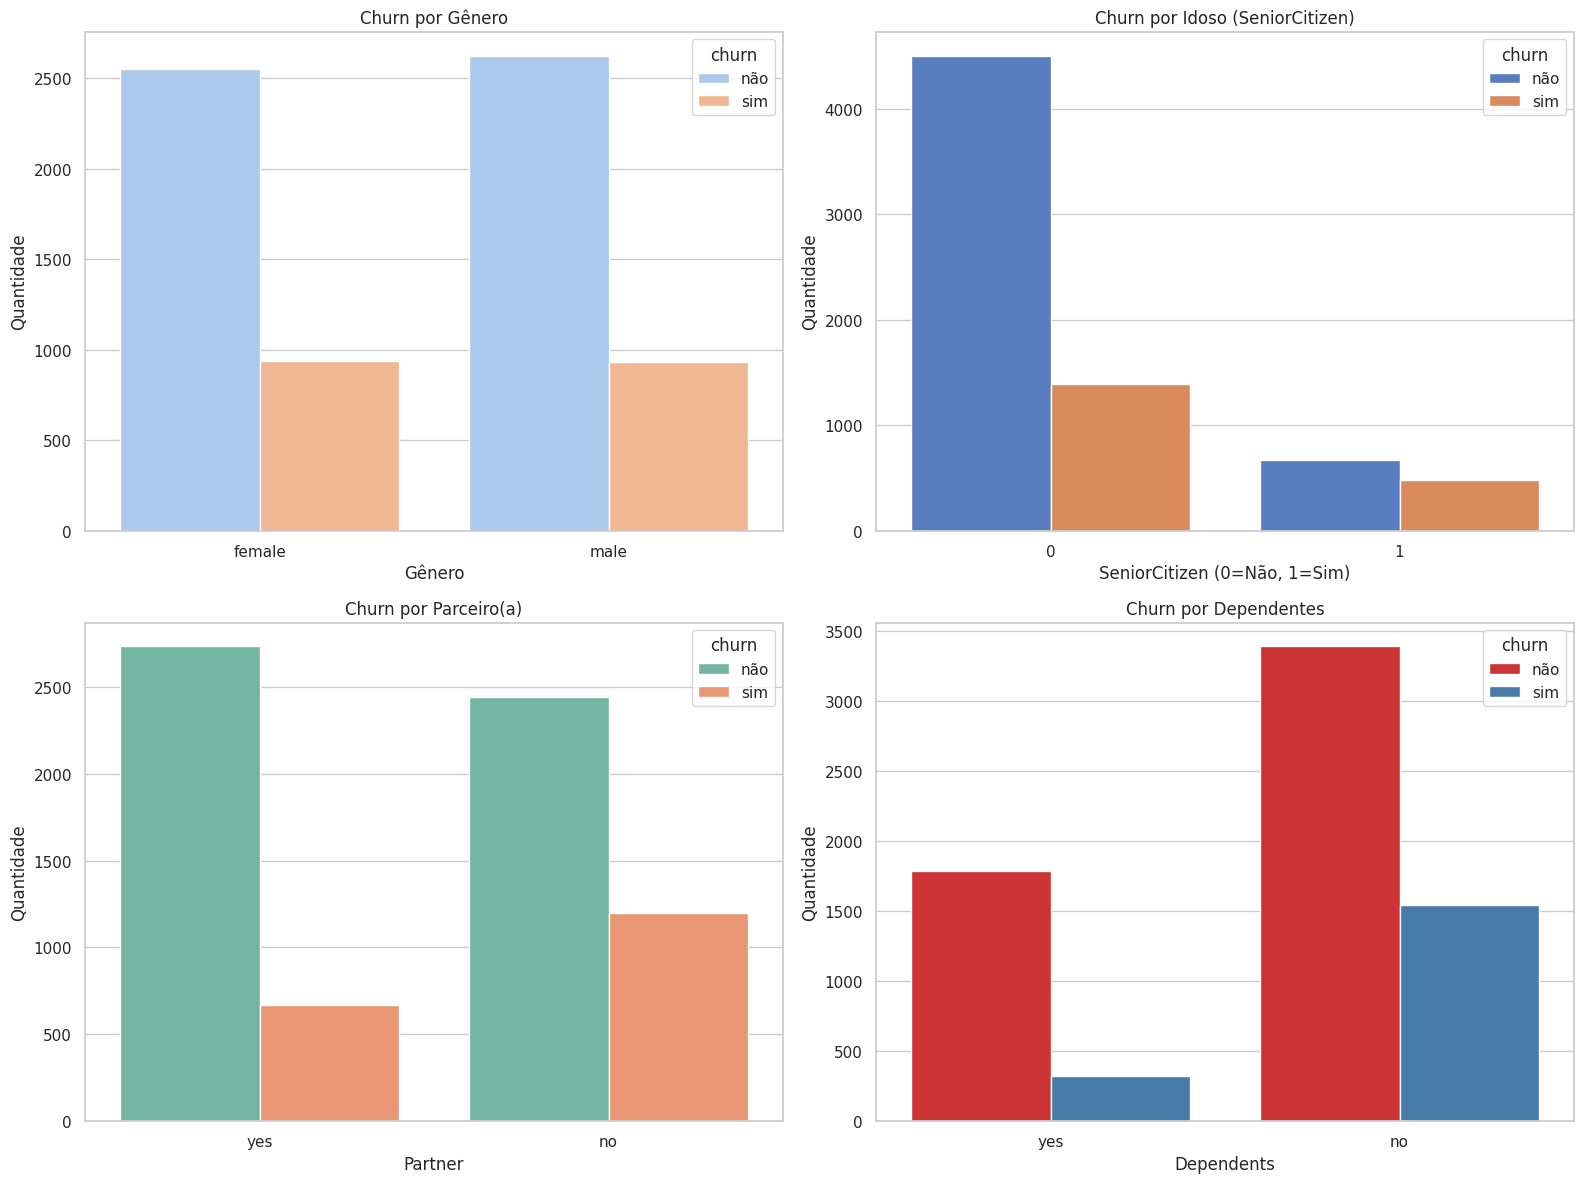

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Churn por gênero
sns.countplot(data=df_final, x='gender', hue='churn', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Churn por Gênero')
axs[0, 0].set_xlabel('Gênero')
axs[0, 0].set_ylabel('Quantidade')

# 2. Churn por SeniorCitizen (idosos ou não)
sns.countplot(data=df_final, x='seniorcitizen', hue='churn', palette='muted', ax=axs[0, 1])
axs[0, 1].set_title('Churn por Idoso (SeniorCitizen)')
axs[0, 1].set_xlabel('SeniorCitizen (0=Não, 1=Sim)')
axs[0, 1].set_ylabel('Quantidade')

# 3. Churn por Partner
sns.countplot(data=df_final, x='partner', hue='churn', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Churn por Parceiro(a)')
axs[1, 0].set_xlabel('Partner')
axs[1, 0].set_ylabel('Quantidade')

# 4. Churn por Dependents
sns.countplot(data=df_final, x='dependents', hue='churn', palette='Set1', ax=axs[1, 1])
axs[1, 1].set_title('Churn por Dependentes')
axs[1, 1].set_xlabel('Dependents')
axs[1, 1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)



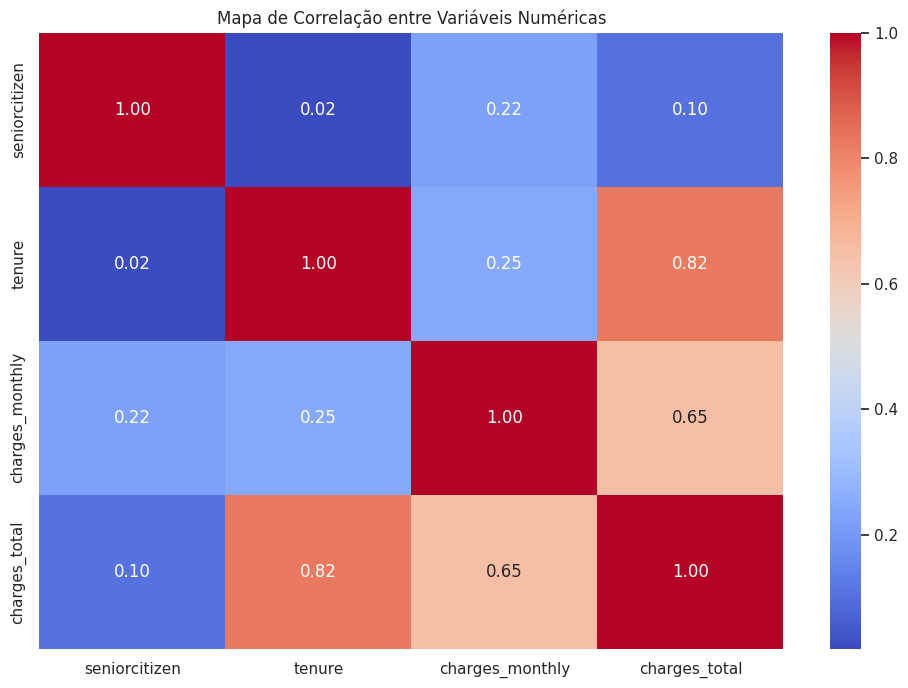

In [ ]:
plt.figure(figsize=(12,8))
corr = df_final.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


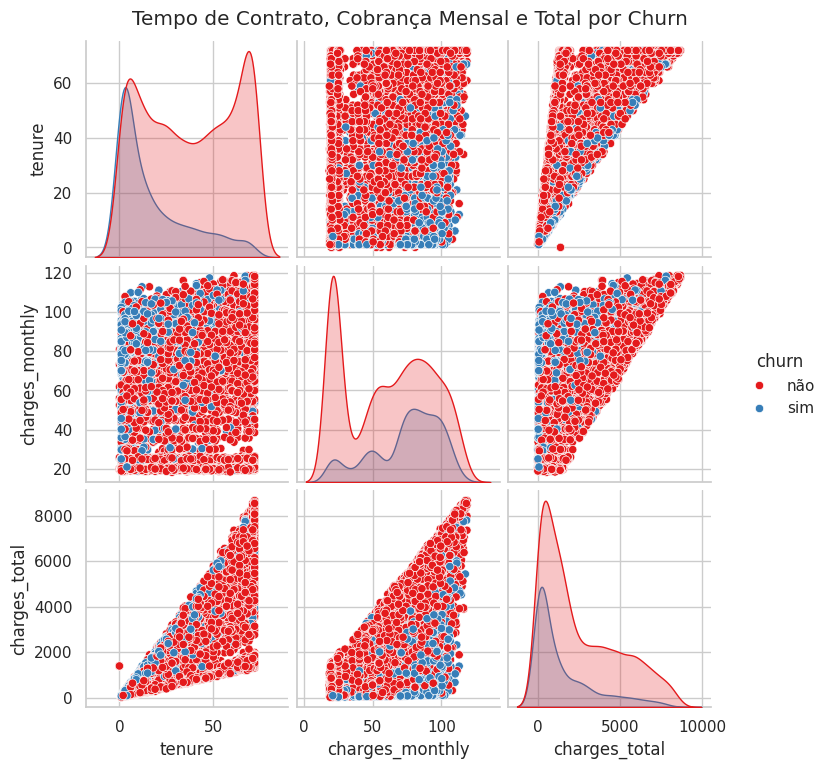

In [ ]:
sns.pairplot(df_final, vars=['tenure', 'charges_monthly', 'charges_total'], hue='churn', palette='Set1')
plt.suptitle('Tempo de Contrato, Cobrança Mensal e Total por Churn', y=1.02)
plt.show()


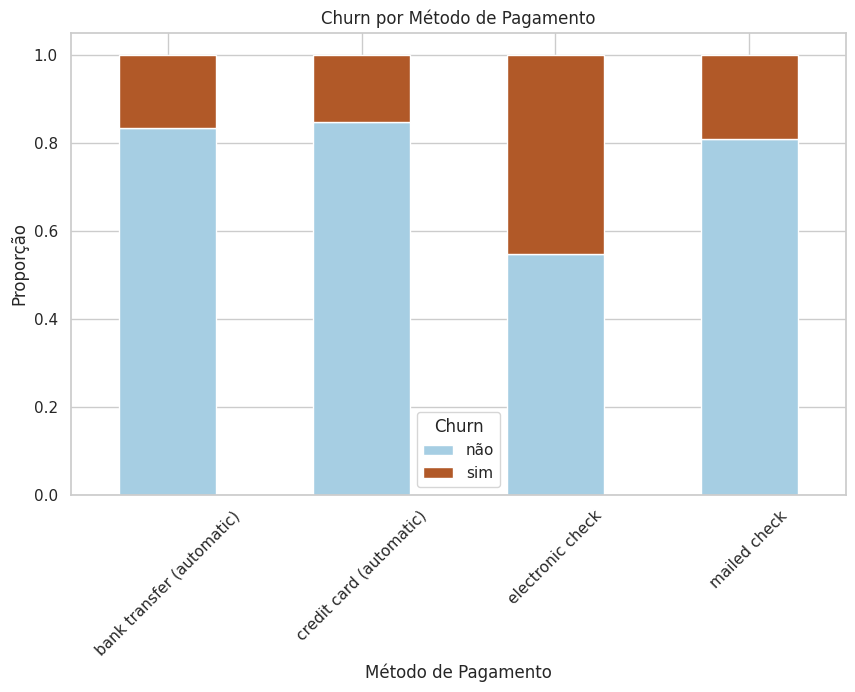

In [ ]:
payment_churn = df_final.groupby(['paymentmethod', 'churn']).size().unstack()
payment_churn_percent = payment_churn.div(payment_churn.sum(axis=1), axis=0)

payment_churn_percent.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Churn por Método de Pagamento')
plt.ylabel('Proporção')
plt.xlabel('Método de Pagamento')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


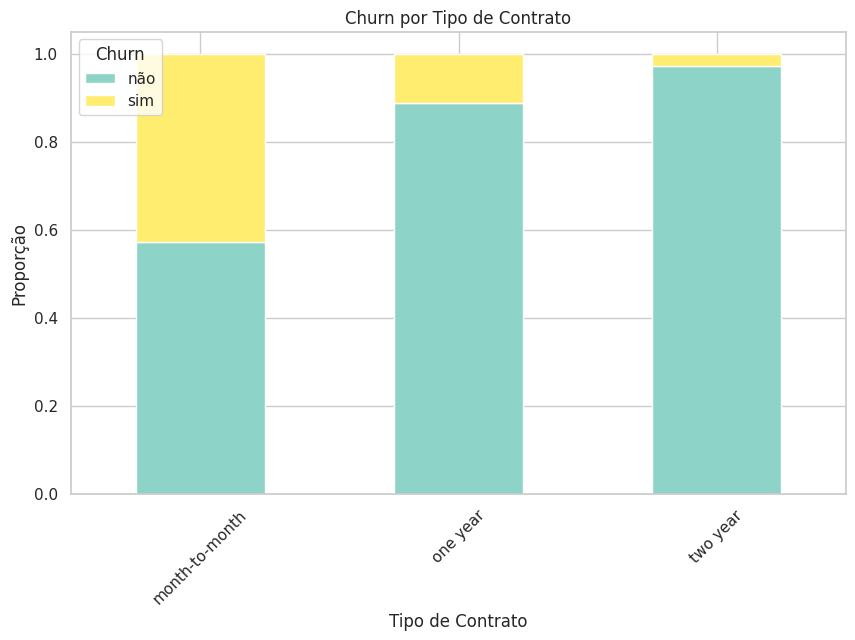

In [ ]:
contract_churn = df_final.groupby(['contract', 'churn']).size().unstack()
contract_churn_percent = contract_churn.div(contract_churn.sum(axis=1), axis=0)

contract_churn_percent.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Churn por Tipo de Contrato')
plt.ylabel('Proporção')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


🚀 Desafio Data Science - TelecomX
🎯 Objetivo
Realizar um processo completo de ETL (Extração, Transformação e Carga) dos dados da TelecomX, seguido por uma análise exploratória detalhada para identificar padrões de churn (cancelamento de clientes) e gerar insights valiosos.

1️⃣ Extração
📥 Como fizemos?

Dados obtidos diretamente via API no formato JSON.

Dados carregados em um DataFrame do pandas para manipulação prática.

Colunas com dados aninhados (tipo JSON) foram identificadas para posterior expansão.

2️⃣ Transformação
🔧 O que foi feito?

Explodimos os campos aninhados em colunas planas, para facilitar análise.

Convertidos valores numéricos para os tipos corretos (float, int).

Tratamos valores faltantes, substituindo por medianas ou valores padrão.

Padronizamos textos, convertendo tudo para minúsculas e removendo espaços.

3️⃣ Carga e Análise
📊 Vamos aos dados!

Montamos um DataFrame final com todas as informações normalizadas.

Realizamos análise exploratória para:

Ver distribuição de churn (quem saiu x quem ficou).

Entender perfil do cliente (tempo de contrato, serviços usados).

Avaliar impacto do tipo de contrato, método de pagamento e outras variáveis.

Criamos gráficos para visualizar tendências e padrões.

4️⃣ Relatório Final
📄 Insights importantes:

📉 Clientes com contrato mensal têm maior probabilidade de churn.

⏳ Maior tempo de permanência está associado à retenção do cliente.

💳 Métodos de pagamento influenciam na fidelidade dos clientes.

📺 Serviços como streaming e suporte técnico também impactam o comportamento de cancelamento.